Cargar la Informacion del dataset

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
import pandas as pd

url = 'https://github.com/JaviBrenes/dataset/blob/main/Mall_Customer.xlsx?raw=true'
data = pd.read_excel(url)

Objetivo 2: Identificar patrones en el comportamiento de gasto de los clientes según su género, edad e ingreso anual.

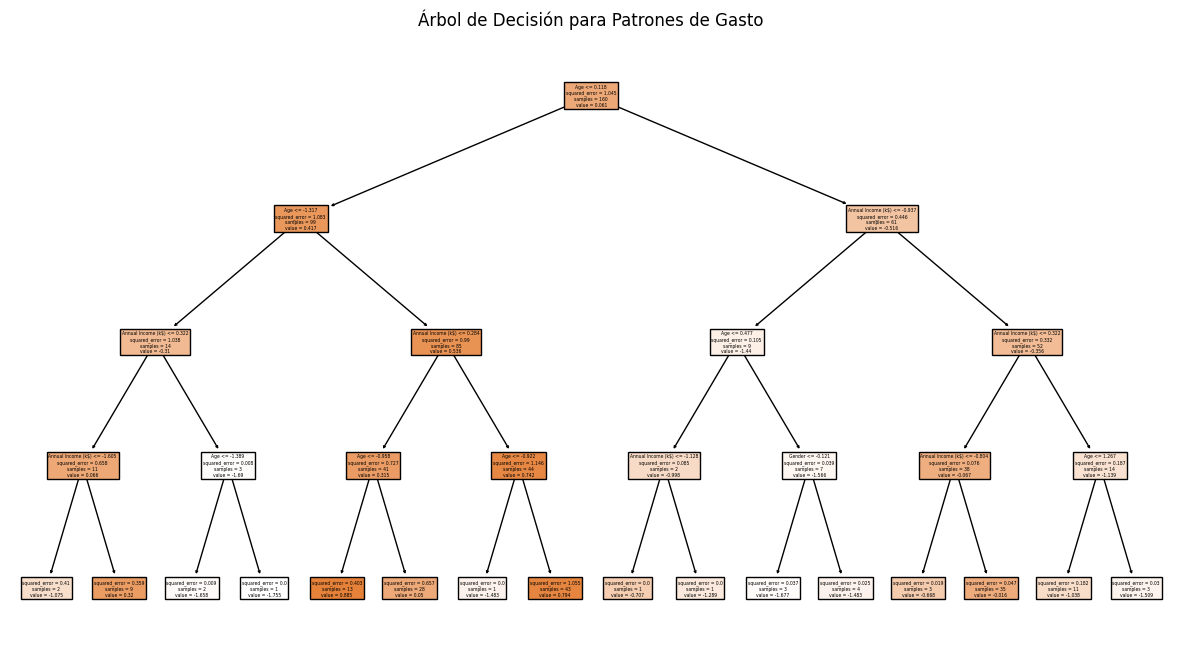

In [8]:
# Preprocesar los datos: Convertir Gender a valores numéricos y manejar valores faltantes
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data[['Age', 'Gender', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# Convertir los datos escalados a un DataFrame
data_preprocessed = pd.DataFrame(data_scaled, columns=['Age', 'Gender', 'Annual Income (k$)', 'Spending Score (1-100)'])


# Preparar las características y la variable objetivo
X = data_preprocessed[['Age', 'Gender', 'Annual Income (k$)']]
y = data_preprocessed['Spending Score (1-100)']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de árbol de decisión con profundidad máxima limitada
regressor = DecisionTreeRegressor(max_depth=4)
regressor.fit(X_train, y_train)

# Graficar el árbol de decisión
plt.figure(figsize=(15, 8))
tree.plot_tree(regressor, feature_names=['Age', 'Gender', 'Annual Income (k$)'], filled=True)
plt.title('Árbol de Decisión para Patrones de Gasto')
plt.show()

Objetivo3.Analizar la distribución demográfica de los clientes y cómo afecta su comportamiento de gasto

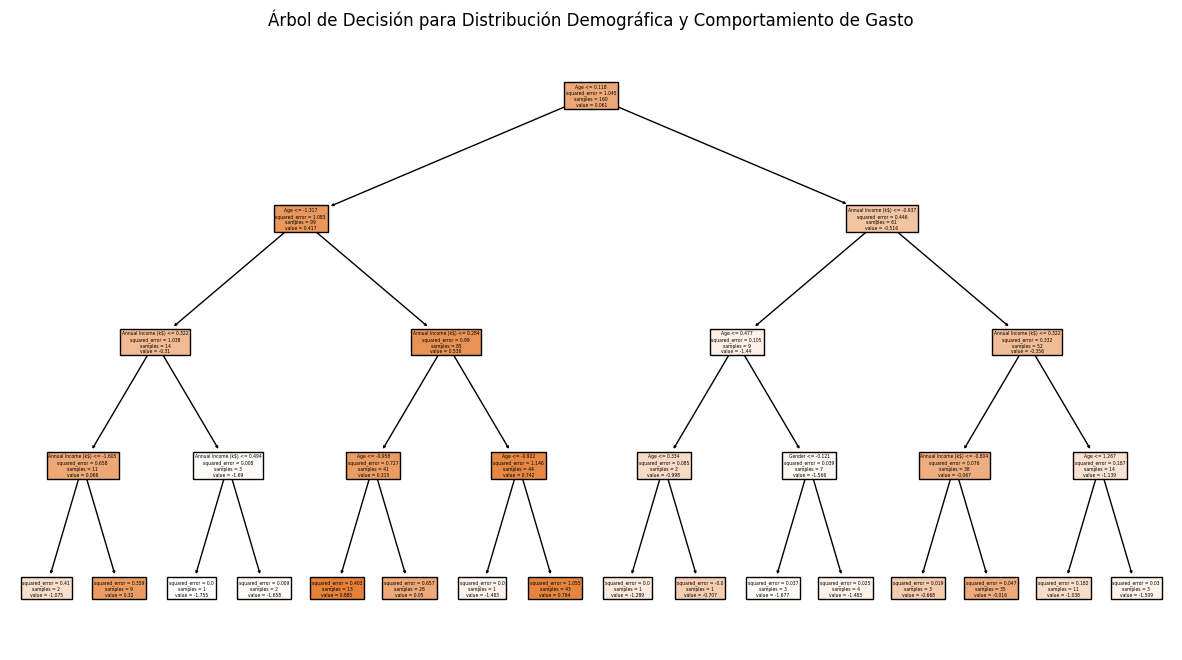

In [9]:
# Preparar las características demográficas y la variable objetivo de comportamiento de gasto
X_demo = data_preprocessed[['Age', 'Gender', 'Annual Income (k$)']]
y_behavior = data_preprocessed['Spending Score (1-100)']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_demo_train, X_demo_test, y_behavior_train, y_behavior_test = train_test_split(X_demo, y_behavior, test_size=0.2, random_state=42)

# Entrenar el modelo de árbol de decisión con profundidad máxima limitada
clf_behavior = DecisionTreeRegressor(max_depth=4)
clf_behavior.fit(X_demo_train, y_behavior_train)

# Graficar el árbol de decisión
plt.figure(figsize=(15, 8))
tree.plot_tree(clf_behavior, feature_names=['Age', 'Gender', 'Annual Income (k$)'], filled=True)
plt.title('Árbol de Decisión para Distribución Demográfica y Comportamiento de Gasto')
plt.show()